###DemApp08:
#Compute function inverse via collocation

Function is 
$$ y^{-2} + y^{-5} - 2x = 0$$

In [1]:
import numpy as np
from compecon import Interpolator, NLP
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib notebook

In [2]:
def resid(c, jac, f, x):
    f.c = c
    y = f(x)
    fval = y ** -2 + y ** -5 - 2*x
    if jac:
        return fval, None
    else:
        return fval

In [3]:
n, a, b = 31, 1.0, 5.0

f = Interpolator(n, a, b)
F = NLP(resid, f, f.nodes)

In [4]:
c = np.zeros(n)
c[0] = 0.2

In [5]:
c, fc = F.broyden(c, tol=1e-10, maxsteps=25)

In [6]:
n = 1000
x = np.linspace(a, b, n)
r = resid(c, False, f, x)

<IPython.core.display.Javascript object>


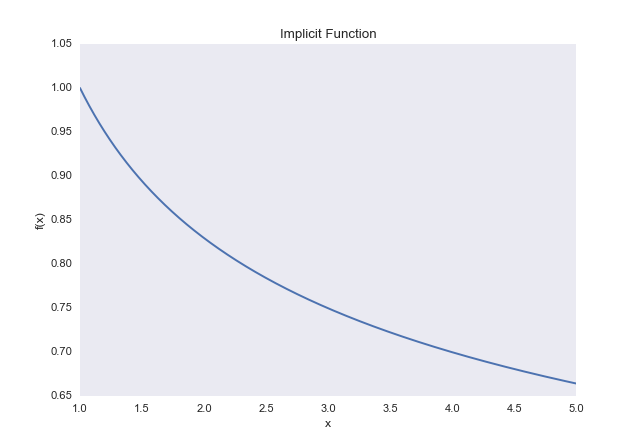

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,title='Implicit Function', xlabel='x', ylabel='f(x)')
ax1.plot(x, f(x));

<IPython.core.display.Javascript object>


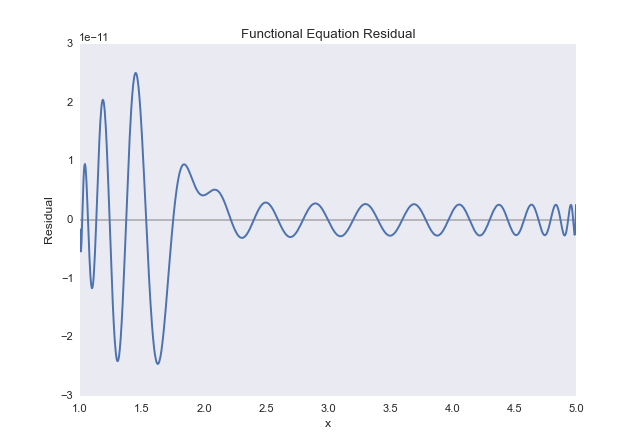

In [8]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,title='Functional Equation Residual', xlabel='x', ylabel='Residual')
ax2.axhline(color='gray', alpha=0.5)
ax2.plot(x, r)
